In [2]:
import matplotlib.pyplot as plt

# Set the default DPI for all matplotlib figures
plt.rcParams["figure.dpi"] = 300


In [3]:
from utils import full_dataset
import polars as pl

df = full_dataset()

df["type"].value_counts().sort("count", descending=True)

type,count
str,u32
"""comment""",36323460
"""story""",5455274
"""job""",17347
"""pollopt""",15123
"""poll""",2180
null,1


In [4]:
stories = df.filter(
    (
        (pl.col("type") == "story")
        & pl.col("time").is_not_null()
        & pl.col("text").is_not_null()
        # & pl.col("url").is_null()
        # & pl.col("deleted").is_null()
        # & pl.col("dead").is_null()
    )
).select(["id", "title", "by", "text", "score", "descendants", "time"])

stories

id,title,by,text,score,descendants,time
i64,str,str,str,i64,i64,datetime[μs]
2290,"""Founders: How many startups ha…","""omarish""","""""",5,2,2007-03-05 06:04:06
25370,"""CBS acquires last.fm for $280m""","""sharpshoot""","""""",13,11,2007-05-30 11:17:33
27550,"""Finally, voting without refres…","""pg""","""""",176,42,2007-06-12 19:00:13
31506,"""They Would be Gods: History of…","""vlad""","""""",3,3,2007-06-29 01:07:48
32668,"""How Costco Became the Anti-Wal…","""brett""","""""",19,10,2007-07-05 22:12:34
…,…,…,…,…,…,…
41812350,"""Ask HN: I have a quick questio…","""clickzyn""","""I would like to create a solut…",1,2,2024-10-11 18:58:46
41812549,"""Ask HN: Are you running RAG in…","""clpm4j""","""It&#x27;s been over a year, gi…",2,0,2024-10-11 19:13:04
41812722,"""Show HN: Mixlayer – code and d…","""zackangelo""","""Hi HN,<p>I&#x27;m excited to i…",3,0,2024-10-11 19:30:12


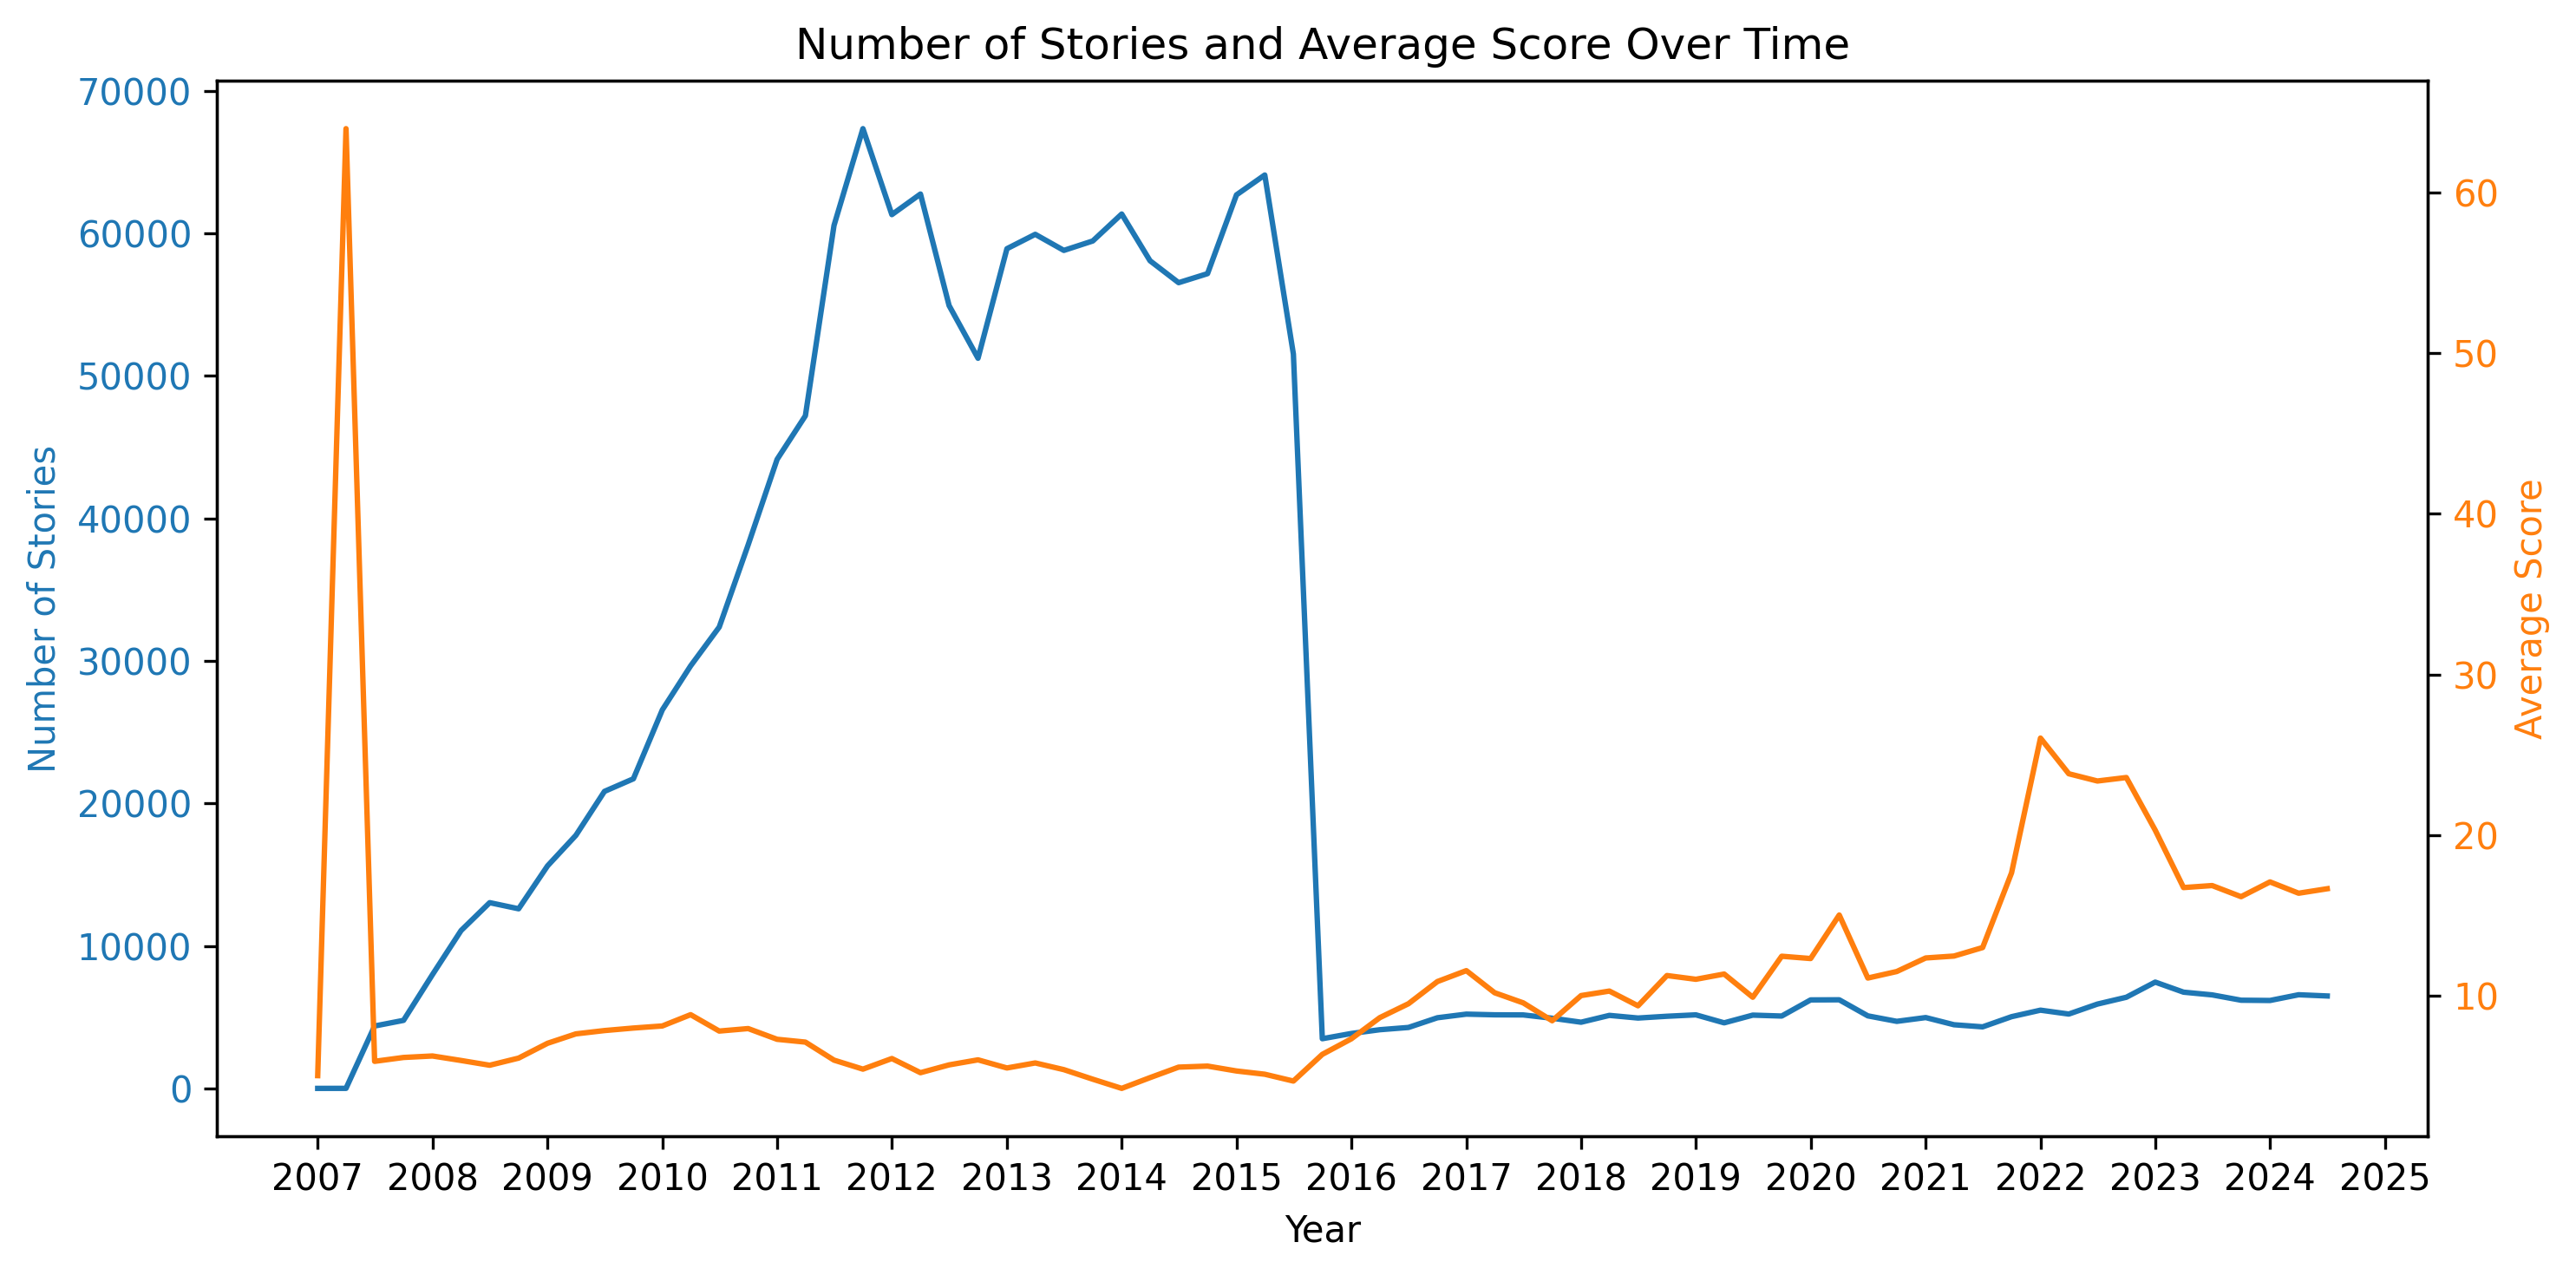

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Limit the data to September 2024
stories_filtered = stories.filter(pl.col("time") < pl.datetime(2024, 10, 1))

stories_with_quarter = stories_filtered.with_columns(
    pl.col("time").dt.truncate("1q").alias("year_quarter")
)

stories_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("id").count().alias("num_stories"))
    .sort("year_quarter")
)

avg_score_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("score").mean().alias("avg_score"))
    .sort("year_quarter")
)

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=300)  # Increased figure size and DPI

# Plot number of stories
color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Stories", color=color)
ax1.plot(
    stories_per_quarter["year_quarter"], stories_per_quarter["num_stories"], color=color
)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis for average score
ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Average Score", color=color)
ax2.plot(
    avg_score_per_quarter["year_quarter"],
    avg_score_per_quarter["avg_score"],
    color=color,
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Number of Stories and Average Score Over Time")

# Set x-axis to show only years
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


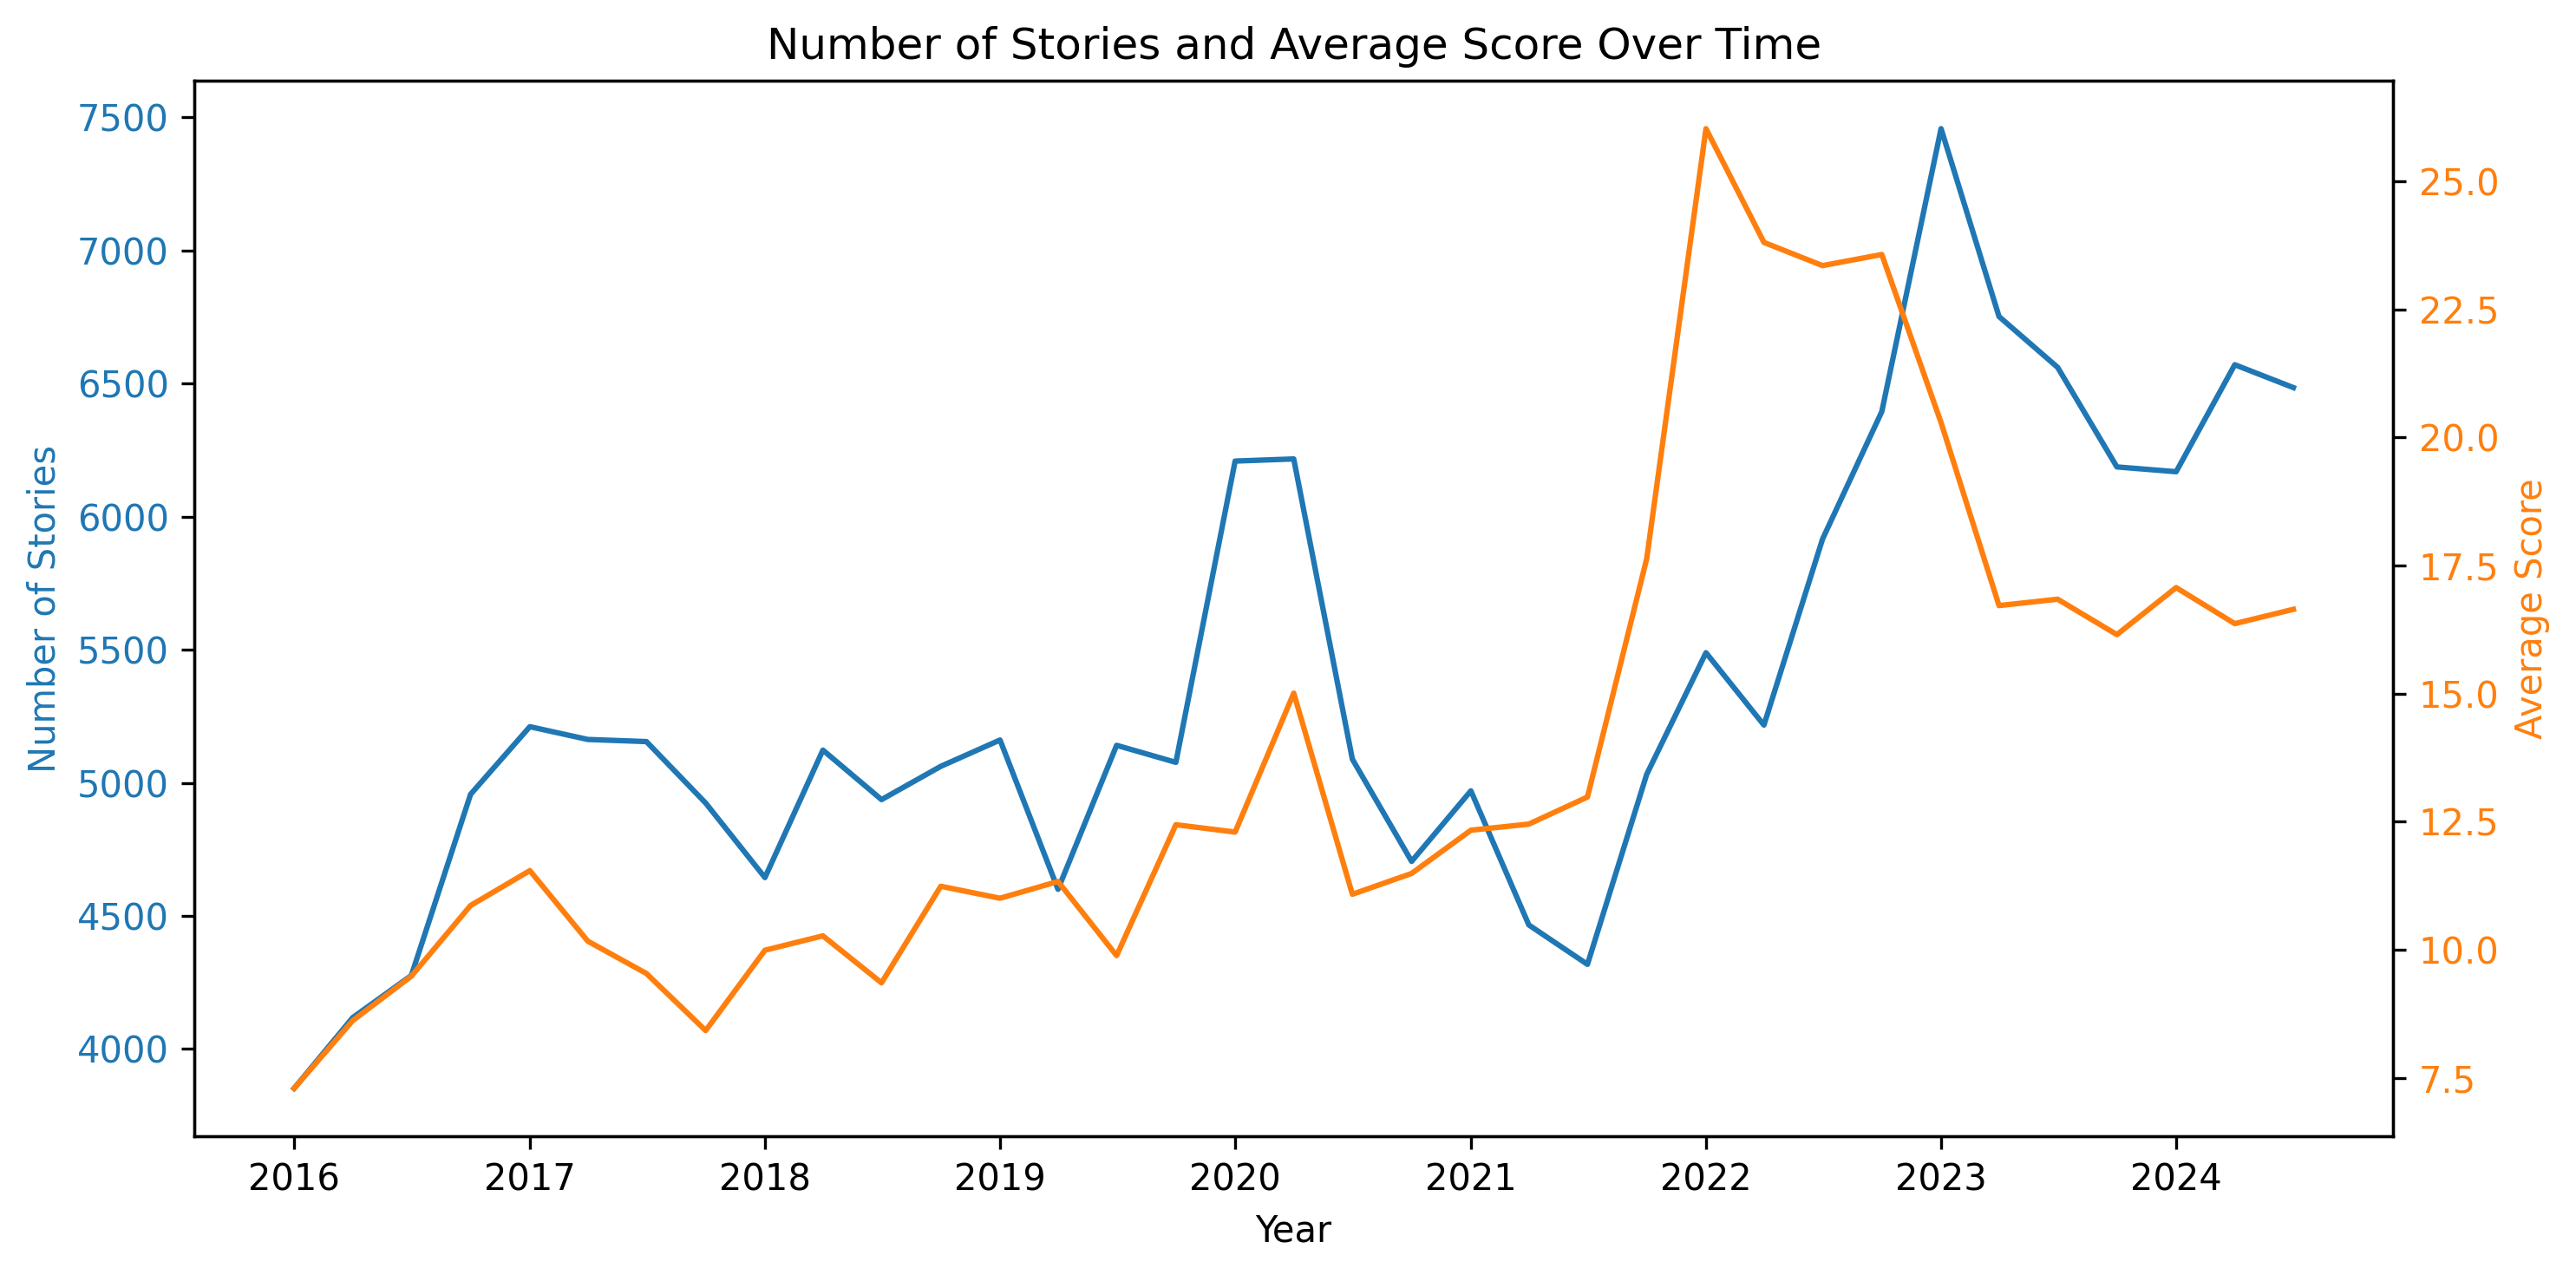

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Limit the data to September 2024
stories_filtered = stories.filter(
    (pl.col("time") < pl.datetime(2024, 10, 1))
    & (pl.col("time") >= pl.datetime(2016, 1, 1))
)

stories_with_quarter = stories_filtered.with_columns(
    pl.col("time").dt.truncate("1q").alias("year_quarter")
)

stories_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("id").count().alias("num_stories"))
    .sort("year_quarter")
)

avg_score_per_quarter = (
    stories_with_quarter.group_by("year_quarter")
    .agg(pl.col("score").mean().alias("avg_score"))
    .sort("year_quarter")
)

fig, ax1 = plt.subplots(figsize=(10, 5), dpi=300)  # Increased figure size and DPI

# Plot number of stories
color = "tab:blue"
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Stories", color=color)
ax1.plot(
    stories_per_quarter["year_quarter"], stories_per_quarter["num_stories"], color=color
)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis for average score
ax2 = ax1.twinx()
color = "tab:orange"
ax2.set_ylabel("Average Score", color=color)
ax2.plot(
    avg_score_per_quarter["year_quarter"],
    avg_score_per_quarter["avg_score"],
    color=color,
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Number of Stories and Average Score Over Time")

# Set x-axis to show only years
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


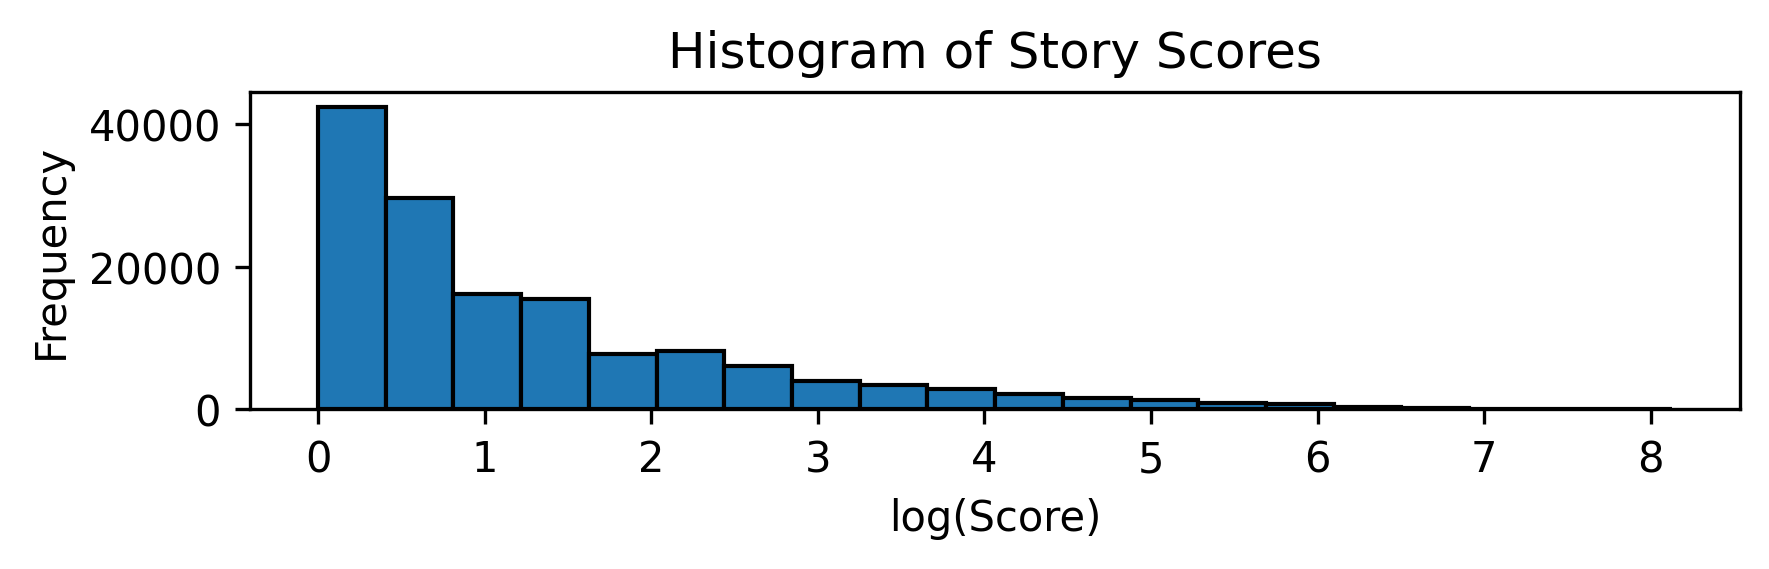

In [7]:
import utils

stories = utils.stories_dataset()

# Create a histogram of the score column
plt.figure(figsize=(6, 2), dpi=300)
plt.hist(stories["log_score"], bins=20, edgecolor="black")
plt.title("Histogram of Story Scores")
plt.xlabel("log(Score)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [8]:
stories["split"].value_counts()

split,count
str,u32
"""val""",14343
"""train""",114274
"""test""",14269


In [9]:
import polars as pl
from inference import run_inference_transformers, load_peft_model
from utils import cache_dataframe, stories_dataset


@cache_dataframe("./data/stories_with_predictions.parquet")
def stories_with_predictions():
    stories = stories_dataset()

    mandt = load_peft_model("./models/stories_model_v2", merge=True)

    predictions = run_inference_transformers(stories["serialized"].to_list(), mandt)
    return stories.with_columns(pl.Series(name="predictions", values=predictions))


stories = stories_with_predictions()

stories = stories.with_columns(
    pl.Series(
        name="predicted_score", values=stories["predictions"].exp().cast(pl.Int64)
    )
)

In [10]:
import math

test_stories = stories.filter(pl.col("split") == "test")

# Calculate the RMSE for baseline prediction (average score)
average_score = test_stories["log_score"].mean()
rmse_baseline = math.sqrt(
    (test_stories["log_score"] - average_score).pow(2).sum() / len(test_stories)
)
print(f"Baseline RMSE: {rmse_baseline:.2f}")

# Calculate the RMSE between the predictions and the log_score, which is the score the model is trained to predict
rmse_model = math.sqrt(
    (test_stories["log_score"] - test_stories["predictions"]).pow(2).sum()
    / len(test_stories)
)
print(f"Model RMSE: {rmse_model:.2f}")

# Calculate and print the correlation for the model
correlation_model = test_stories.select(pl.corr("log_score", "predictions"))[
    "log_score"
][0]
print(f"Model Correlation: {correlation_model:.2f}")

Baseline RMSE: 1.33
Model RMSE: 1.13
Model Correlation: 0.53


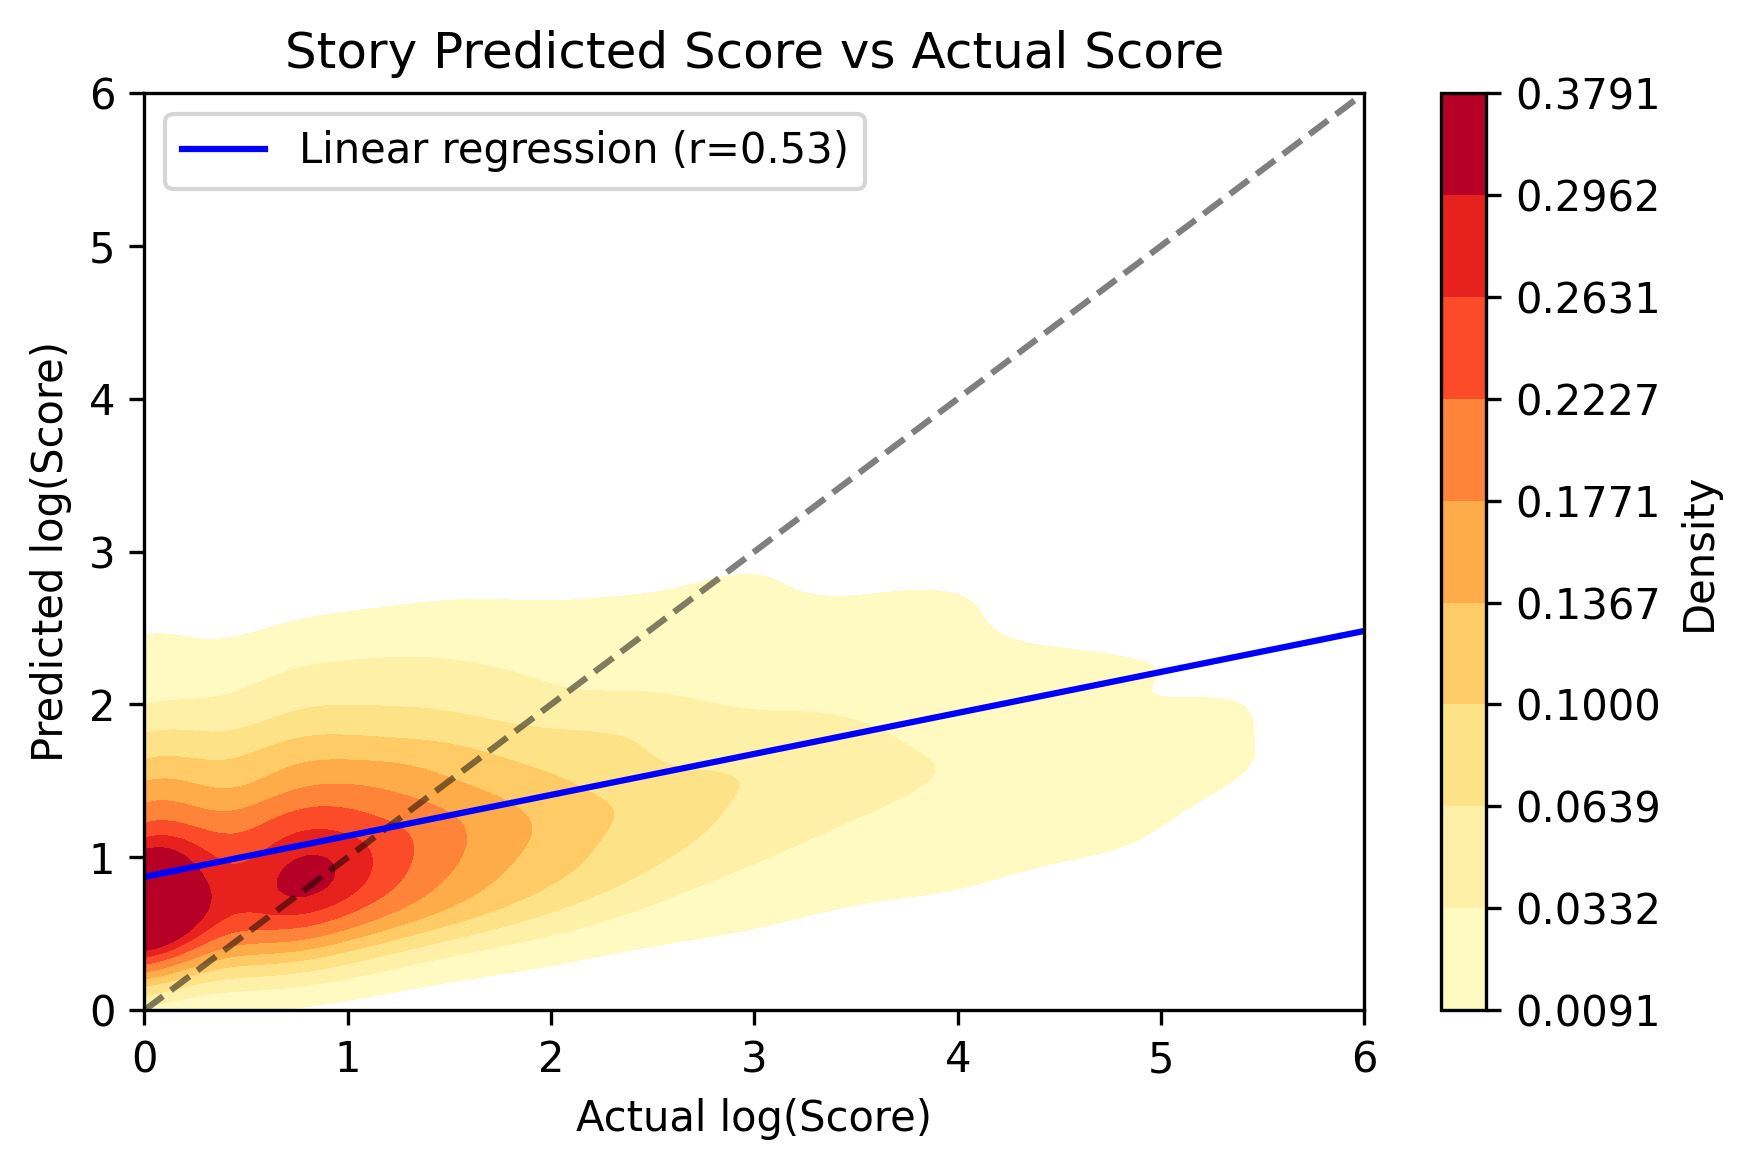

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the range for the heatmap
min_score = 0
max_score = 6

# Create a more continuous 2D histogram
plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=test_stories.sample(10000, seed=42),
    x="log_score",
    y="predictions",
    cmap="YlOrRd",
    fill=True,
    cbar=True,
    cbar_kws={"label": "Density"},
)

plt.title("Story Predicted Score vs Actual Score")
plt.xlabel("Actual log(Score)")
plt.ylabel("Predicted log(Score)")

# Set axis limits to match the data range
plt.xlim(min_score, max_score)
plt.ylim(min_score, max_score)

# Add a diagonal line for reference
plt.plot([min_score, max_score], [min_score, max_score], "k--", alpha=0.5)

# Add linear regression line
x = test_stories["log_score"].to_numpy()
y = test_stories["predictions"].to_numpy()
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * np.array([min_score, max_score]) + intercept
plt.plot(
    [min_score, max_score],
    line,
    color="blue",
    label=f"Linear regression (r={r_value:.2f})",
)
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
from IPython.display import display, HTML

stories = stories.with_columns(
    (pl.col("score") - pl.col("predicted_score")).alias("score_diff")
)

stories = stories.with_columns(
    pl.concat_str(
        pl.lit("https://news.ycombinator.com/item?id="),
        pl.col("id"),
    ).alias("link"),
)

# Filter out stories with "Who is Hiring" in the title
stories = stories.filter(~pl.col("title").str.contains("Who is hiring"))


def print_stories(polars_df: pl.DataFrame):
    df = polars_df.select(["title", "link", "predicted_score", "score"]).to_pandas()
    df["title"] = df.apply(
        lambda row: f'<a href="{row["link"]}">{row["title"]}</a>', axis=1
    )
    df = df.drop(columns=["link"])
    df = df.rename(
        columns={
            "title": "Story",
            "predicted_score": "Predicted Score",
            "score": "Actual Score",
            # "split": "Split",
        }
    )
    display(HTML(df.to_html(escape=False, index=False)))


print_stories(stories.sort("predicted_score", descending=True).head(10))
print_stories(
    stories.filter(pl.col("score") == 1)
    .sort("predicted_score", descending=True)
    .head(10)
)


Story,Predicted Score,Actual Score
Tell HN: Gitlab.com doesn't allow issue search without signing in,443,48
Stripe has decided to nuke my entire business,391,1624
Tell HN: I made $1000 with my app and now making $500/mo,391,578
Tell HN: YouTube is banning accounts that support Ukraine,356,1095
Tell HN: Wikipedia blocks T-Mobile's entire IPv6 address space,356,60
Mattermost [update: isn't] suspending our licenses because of 'US sanctions',356,26
Tell HN: FairEmail terminated after Google falsely flagged as spyware,324,123
Ask HN: Apple revoked developer account for 2.5 years and counting,304,213
Tell HN: Instagram demands I send a picture of myself to prove I own my account,304,332
Ask HN: Those making $500+/month on side projects in 2023 – Show and tell,304,436


Story,Predicted Score,Actual Score
WhatsApp got blocked in Iran but stopped working for Iranians traveling abroad,135,1
Ask HN: I'm being ousted as CEO of my SaaS company by power-grabbing co-founders,56,1
We have recorded the sound of a single electron clapping,52,1
"Ask HN: Programmer for 20 years, burned out twice, how do I keep working?",44,1
Tell HN: Twitter just turned off two-factor authentication my account,43,1
Certainly we can have nice things,39,1
"Launch HN: Torre Signals – Build a following you'd like to work with, get alerts",39,1
NameCheap Is Not a Unicorn,38,1
Google closed my decade-old Cloud account,37,1
Heroku Will Delete 8m Row Database with 7 Days' Notice,33,1
